# Linear Regression for House Moving

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# poetry add: numpy, pandas, juputerlab, mathplotlib, sklearn, seaborn

### Load info to pandas

In [2]:
# load the data
cities = pd.read_csv('./cities.csv')

### Show first 5 rows

In [3]:
cities.head(5)

,City,Country,Housing Affordability,Living Costs by Income,Unemployment,Education,Safety,Mobility,Air Quality,Healthcare,Kids Activities,Paid Parental Leave,Family Inclusivity,Neighbourhood Safety,Family-Friendliness,Total,Lat,Long
0,Helsinki,Finland,76.29,91.71,9.20,92.54,88.7,77.30,19.11,84.40,71.15,1190,100.0,89,95,100.00,60.167410,24.942577
1,Quebec,Canada,99.81,86.30,3.80,95.23,92.5,73.02,18.00,76.32,78.66,364,100.0,94,92,99.06,52.476089,-71.825867
2,Oslo,Norway,84.60,94.95,2.30,89.08,87.3,75.95,22.49,85.97,68.67,707,100.0,87,96,98.13,59.913330,10.738970
3,Munich,Germany,83.49,100.00,3.77,90.06,90.4,79.00,21.38,73.33,78.16,467,100.0,83,94,96.75,48.137108,11.575382
4,Copenhagen,Denmark,80.60,94.88,4.40,89.08,93.6,98.09,26.54,73.47,78.79,364,100.0,81,92,96.53,55.686724,12.570072


### Show the dataset description

In [4]:
cities.describe

<bound method NDFrame.describe of             City  Country  Housing Affordability  Living Costs by Income  \
0       Helsinki  Finland                  76.29                   91.71   
1         Quebec   Canada                  99.81                   86.30   
2           Oslo   Norway                  84.60                   94.95   
3         Munich  Germany                  83.49                  100.00   
4     Copenhagen  Denmark                  80.60                   94.88   
..           ...      ...                    ...                     ...   
145       Manama  Bahrain                  48.95                   70.29   
146       Ankara   Turkey                  65.29                   15.37   
147        Izmir   Turkey                  57.27                    5.54   
148  Kuwait City   Kuwait                   1.00                   64.96   
149     Istanbul   Turkey                  22.51                    1.00   

     Unemployment  Education  Safety  Mobility  Air Q

### Show dataset info 

In [5]:
cities.info

<bound method DataFrame.info of             City  Country  Housing Affordability  Living Costs by Income  \
0       Helsinki  Finland                  76.29                   91.71   
1         Quebec   Canada                  99.81                   86.30   
2           Oslo   Norway                  84.60                   94.95   
3         Munich  Germany                  83.49                  100.00   
4     Copenhagen  Denmark                  80.60                   94.88   
..           ...      ...                    ...                     ...   
145       Manama  Bahrain                  48.95                   70.29   
146       Ankara   Turkey                  65.29                   15.37   
147        Izmir   Turkey                  57.27                    5.54   
148  Kuwait City   Kuwait                   1.00                   64.96   
149     Istanbul   Turkey                  22.51                    1.00   

     Unemployment  Education  Safety  Mobility  Air Qua

### Create a subset of houses on US

In [6]:
us_cities = cities.loc[cities['Country'] == 'US']
# us_cities

### Select corresponding features

In [7]:
X = us_cities['Living Costs by Income'].values
y = us_cities['Education'].values

# Transform from 1D to 2D, with all rows as needed(-1)
X = X.reshape(-1,1)
# X

### Create trains

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=100)
print(f"X_train shape {x_train.shape}")
print(f"y_train shape {y_train.shape}")
print(f"X_test shap {x_test.shape}")
print(f"y_test shape {y_test.shape}")
print(y_test)

X_train shape (38, 1)
y_train shape (38,)
X_test shap (10, 1)
y_test shape (10,)
[86.94 85.53 86.86 85.78 85.53 85.95 86.2  86.53 86.03 85.62]


### Create plot to show

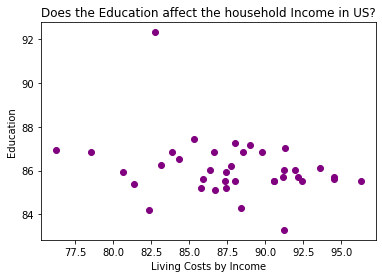

In [9]:
#  had to add the nexy line to make this work
import matplotlib.pyplot as plt

%matplotlib inline
plt.scatter(x_train,y_train,color='purple')
plt.xlabel('Living Costs by Income')
plt.ylabel('Education')
plt.title('Does the Education affect the household Income in US?')
plt.show()

### Calculate the Train and Test accuracy

In [10]:
lm = LinearRegression()
lm.fit(x_train,y_train)
y_predict = lm.predict(x_test)
print(f"Train accuracy {round(lm.score(x_train,y_train)*100,2)} %")
print(f"Test accuracy {round(lm.score(x_test,y_test)*100,2)} %")

Train accuracy 7.2 %
Test accuracy -227.15 %


### Create the model Plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

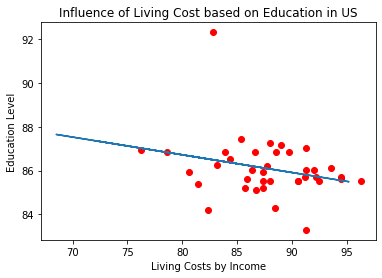

In [11]:
plt.scatter(x_train,y_train,color='red')
plt.plot(x_test,y_predict)
plt.xlabel("Living Costs by Income")
plt.ylabel("Education Level")
plt.title("Influence of Living Cost based on Education in US")
plt.plot

### Using seaborn

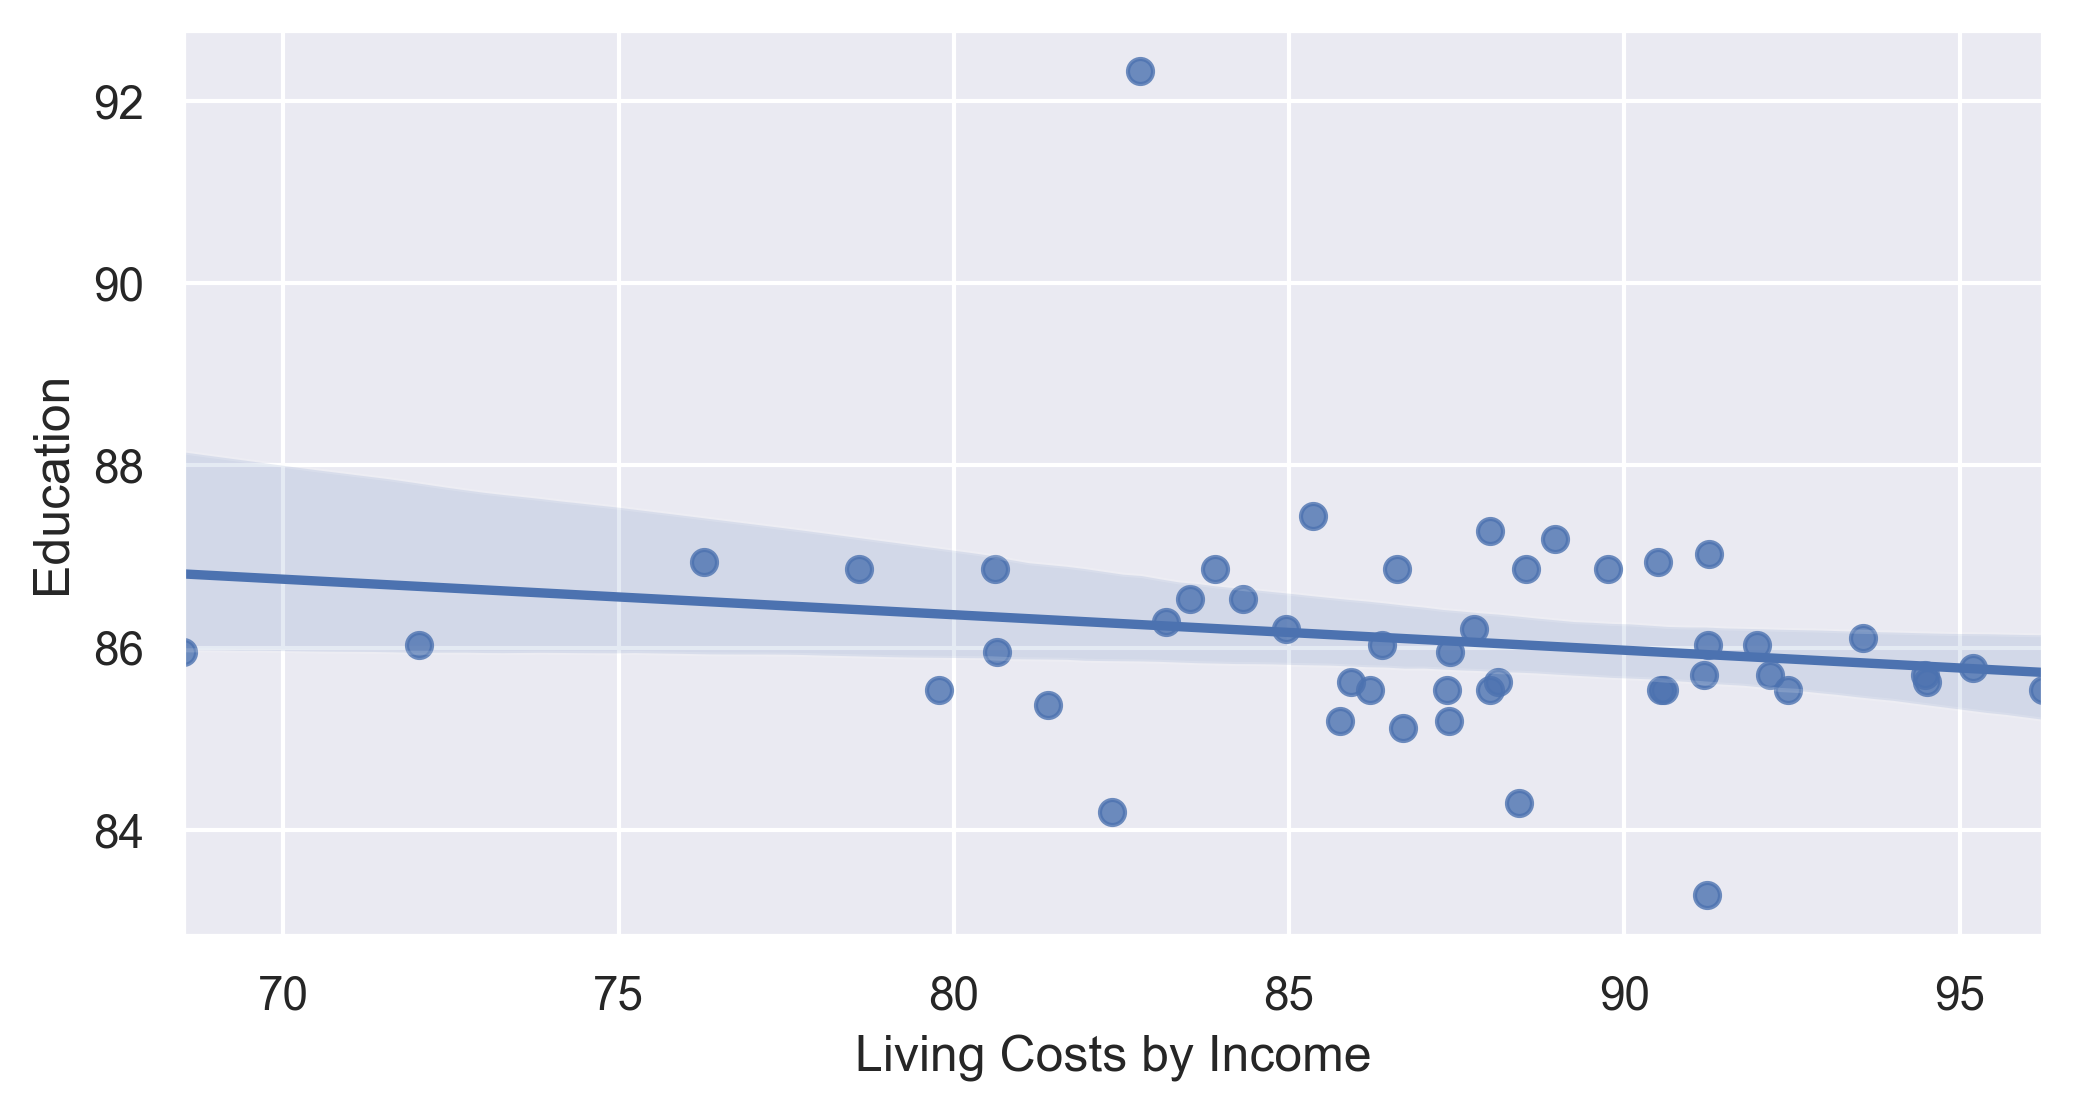

In [12]:
import seaborn as sns

sns.set()
plt.figure(figsize=(8,4),dpi=300)
sns.regplot(x='Living Costs by Income', y='Education', data=us_cities, order=1)

### Conclusions

1. The most expensive living cost by income, not necessarily are the ones with more education. 
1. The less education, the less living cost.
1. Not the houses with a greater education, necessarily have more living cost than the average.